In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [2]:
cols=df.columns

NameError: name 'df' is not defined

In [1]:
for col in cols:
    if(df[col].dtypes == 'float'):
        sns.distplot(df[col])
        plt.show()
    else:
        sns.histplot(df[col])
        plt.show()

NameError: name 'cols' is not defined

In [8]:
for col in cols:
    if(df[col].dtypes=='object'):
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].mean())

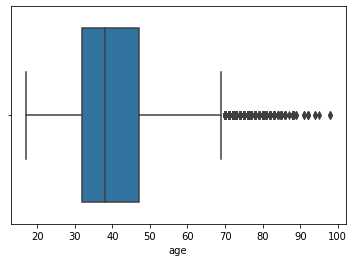

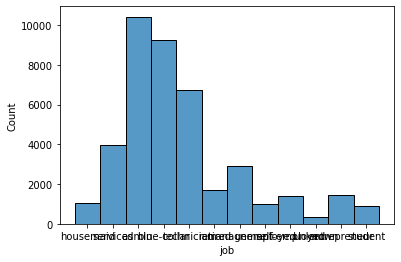

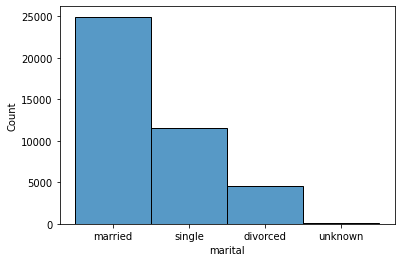

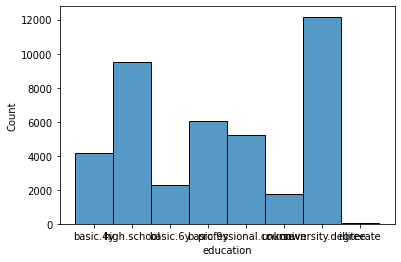

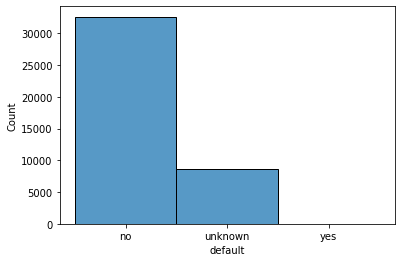

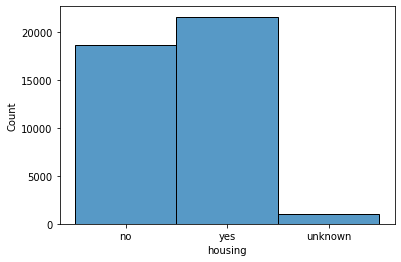

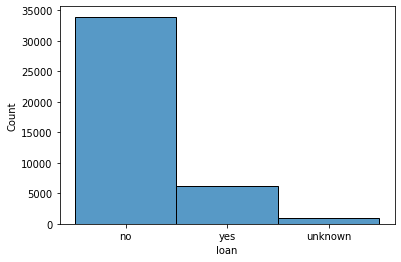

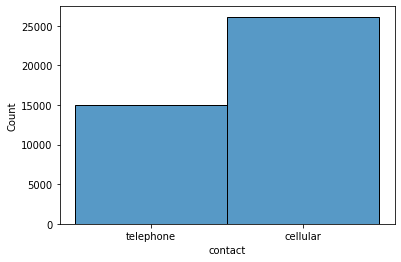

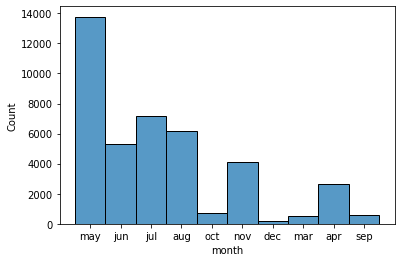

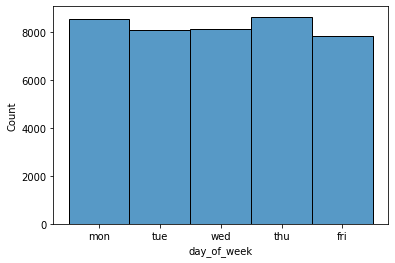

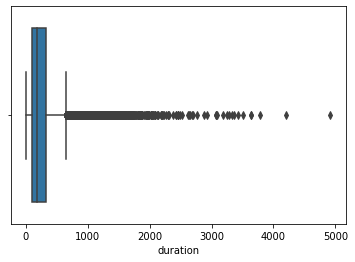

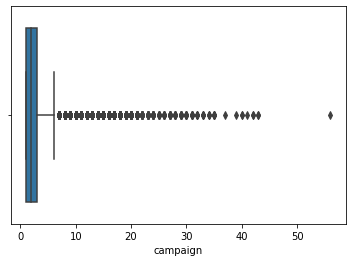

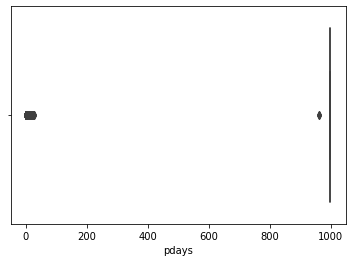

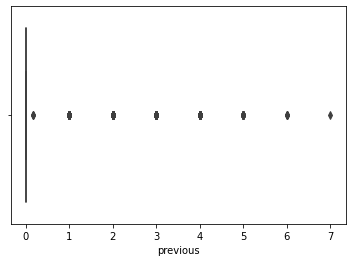

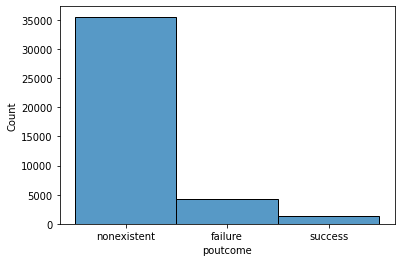

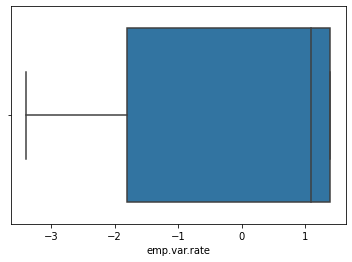

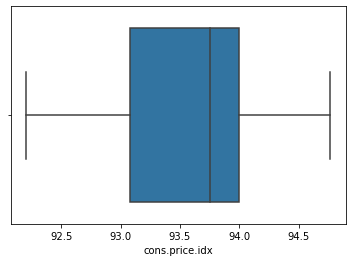

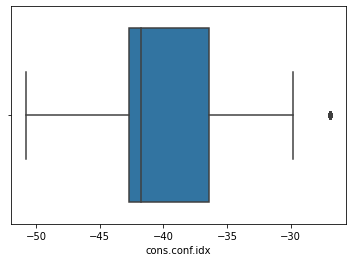

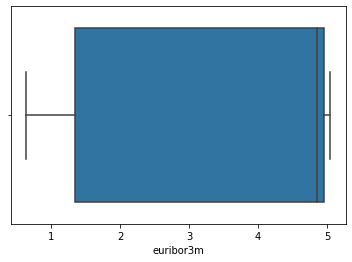

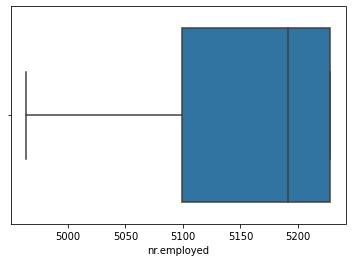

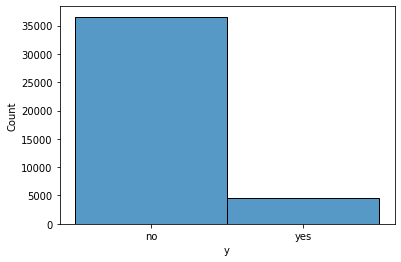

In [9]:
for col in cols:
    if(df[col].dtypes == 'float' or df[col].dtypes == 'int'):
        sns.boxplot(df[col])
        plt.show()
    else:
        sns.histplot(df[col])
        plt.show()

In [10]:
#handling outliers
data=df
col_names=['age','duration','campaign','cons.conf.idx']
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]


Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.duration >= Q1 - 1.5*IQR) & (data.duration <= Q3 + 1.5*IQR)]

Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.campaign >= Q1 - 1.5*IQR) & (data.campaign <= Q3 + 1.5*IQR)]

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx'] >= Q1 - 1.5*IQR) & (data['cons.conf.idx'] <= Q3 + 1.5*IQR)]

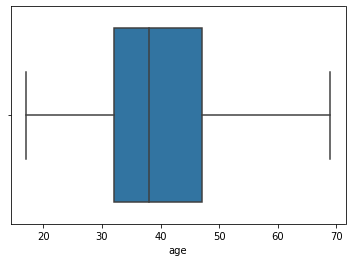

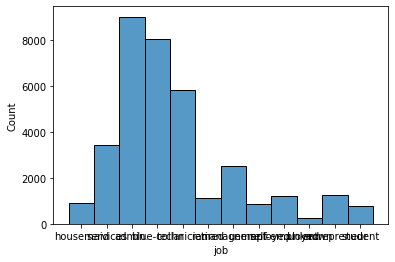

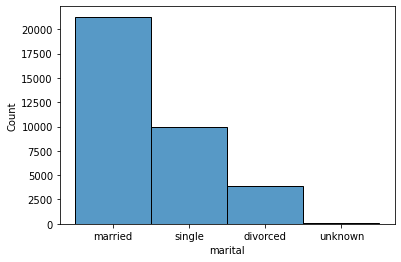

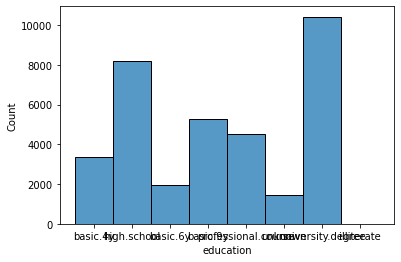

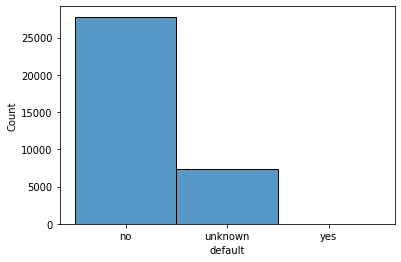

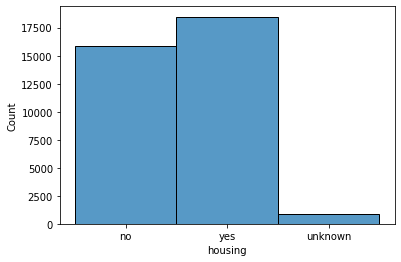

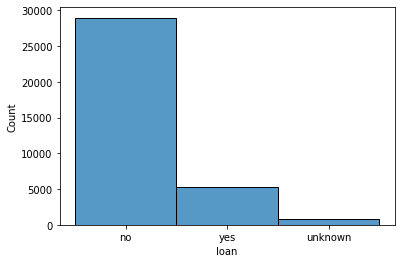

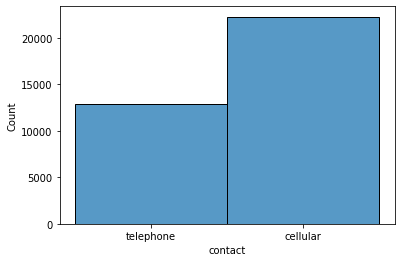

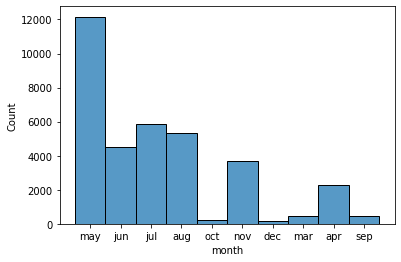

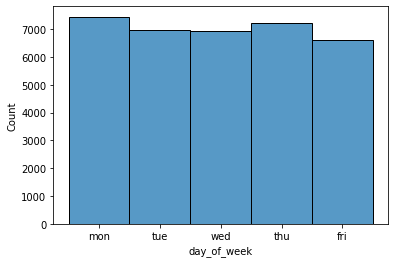

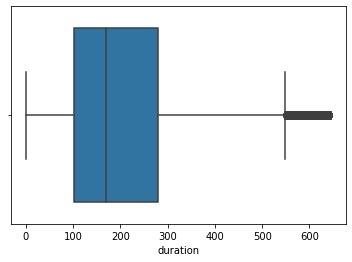

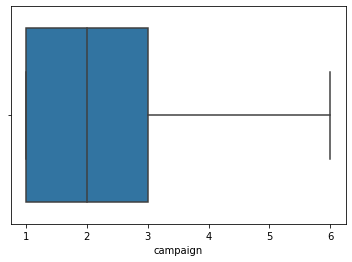

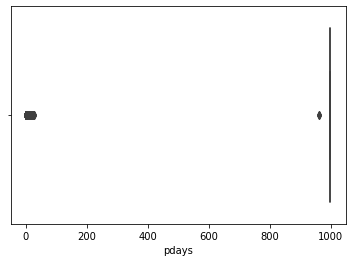

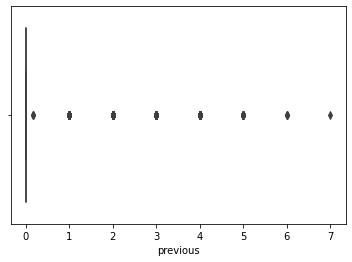

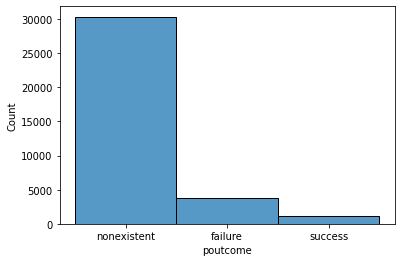

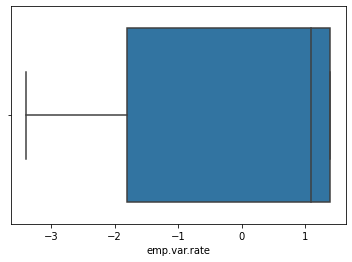

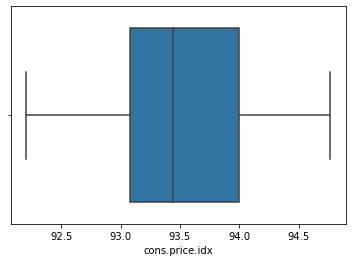

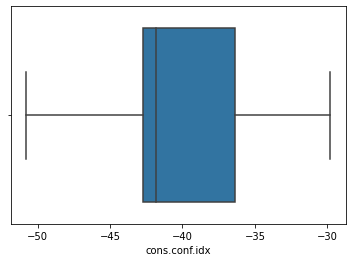

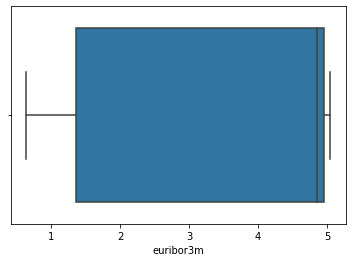

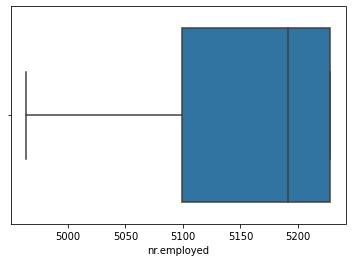

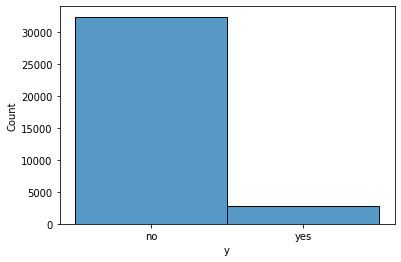

In [11]:
for col in cols:
    if(data[col].dtypes == 'float' or data[col].dtypes == 'int'):
        sns.boxplot(data[col])
        plt.show()
    else:
        sns.histplot(data[col])
        plt.show()

In [12]:
# cols.drop("y")
cols

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# le=LabelEncoder()
# data['y']=le.fit_transform(data['y'])
# data['y']=data['y'].astype(str)
# data.y.value_counts()

We cant do Label encoding on target variable or depedent variable i,e y 

In [15]:
data['y'] = np.where(data['y'] == 'yes',1,0)
data['y']=data['y'].astype(str)

In [16]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Feature Selection

Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable.

In [17]:
bins = [0, 50, 100]
data['age'] = pd.cut(data['age'], bins)

data['age'] = data.age.astype(str)

In [18]:
data['age'].value_counts()/len(data['age'])

(0, 50]      0.8361
(50, 100]    0.1639
Name: age, dtype: float64

In [19]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.4000,4.857000,5191.000000,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.4000,4.857000,5191.000000,0
2,"(0, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.4000,4.857000,5191.000000,0
3,"(0, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.4000,4.857000,5191.000000,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.4000,4.857000,5191.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41186,"(0, 50]",technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.000000,999.000000,0.000000,nonexistent,-1.100000,94.767000,-50.8000,1.028000,4963.600000,1
41188,"(0, 50]",admin.,married,university.degree,no,yes,no,cellular,may,thu,...,2.567676,962.482547,0.173124,nonexistent,0.081656,93.575867,-40.5046,3.620787,5166.996405,0
41189,"(0, 50]",retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.000000,999.000000,1.000000,nonexistent,-1.100000,94.767000,-50.8000,1.028000,4963.600000,0
41191,"(0, 50]",admin.,married,university.degree,no,yes,no,cellular,may,thu,...,2.567676,962.482547,0.173124,nonexistent,0.081656,93.575867,-40.5046,3.620787,5166.996405,0


# 1.Chi-Square test

Chi-Square test is normally done on Categorical data(object) ,where we will select each independent attribute and calculating chi-Square statistics value with the help of  observed value and expected value. 

if observed and expected values are close then we'll have high chi-square statistics.(high chi-square stats implies attributes are highly independent)
if observed and expected values are far then we'll have less chi-square statistics.(less chi-square stats implies attributes are  not independent)

With the above concept we'll set null and alternative hypothesis and check for its acceptance or rejection through p-value and alpha value (significance value)

if p -value > alpha value ,we reject null hypothesis
if p-value  < alpha value ,we accept null hypothesis

In [20]:
# df_p=pd.DataFrame(columns={"Feature","P-value"})
# for col in cols:
from scipy.stats import chisquare
import scipy.stats
from scipy.stats import chi2
#from scipy import stats
from scipy.stats import chi2_contingency
     
###Chisq Test for Independence
dataset_table=pd.crosstab(data['age'],data['y'])
print(dataset_table)

y              0     1
age                   
(0, 50]    27252  2162
(50, 100]   5197   569


In [21]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[27252  2162]
 [ 5197   569]]


In [22]:
val=chi2_contingency(dataset_table)
val

(42.336130954268796,
 7.685944305073311e-11,
 1,
 array([[27130.61074474,  2283.38925526],
        [ 5318.38925526,   447.61074474]]))

In [23]:
val[3]

array([[27130.61074474,  2283.38925526],
       [ 5318.38925526,   447.61074474]])

In [24]:
Expected_Values=val[3]
Expected_Values

array([[27130.61074474,  2283.38925526],
       [ 5318.38925526,   447.61074474]])

In [25]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

42.687061087303036

In [26]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

Degree of Freedom:- 1


In [27]:
alpha=0.05
print("chi_square_statistic:",chi_square_statistic)

chi_square_statistic: 42.687061087303036


In [28]:
# Critical Values
critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
print("critical_value:",critical_value)

critical_value: 3.841458820694124


In [29]:
# P value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print("P-Value",p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)
# if(p_value) > alpha:
#     print("reject null hypothesis")
# else:
#     print("Accept Null hypothesis")

P-Value 6.423572784797216e-11
Significance level:  0.05
Degree of Freedom:  1
p-value: 6.423572784797216e-11


In [30]:
ft={"Age":p_value}
dft=pd.DataFrame()
dft.append(ft,ignore_index=True)

,Age
0,6.423573e-11


In [31]:
pd.options.display.float_format = '{:20,.2f}'.format

In [32]:
# Chi Squre test for all object fields
col_list=list(data.columns)
col_list.remove('y')
df=pd.DataFrame(columns={"Feature","P-Value"})
for col in col_list:
    if(data[col].dtype=='object'):
        dataset_table=pd.crosstab(data[col],data['y'])
        Observed_Values=dataset_table.values
        val=chi2_contingency(dataset_table)
        Expected_Values=val[3]
        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]
        no_of_rows=Observed_Values.shape[0]
        no_of_columns=Observed_Values.shape[1]
        ddof=(no_of_rows-1)*(no_of_columns-1)
        alpha = 0.05
        critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
        p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        df=df.append({'Feature':col, 'P-Value': p_value}, ignore_index=True)
        
df

,P-Value,Feature
0,0.00,age
1,0.00,job
2,0.00,marital
3,0.00,education
4,0.00,default
5,0.02,housing
6,0.34,loan
7,0.00,contact
8,0.00,month
9,0.00,day_of_week


In [33]:
# dataset_table

#so from above output we can see ,loan attribute have p-value greater than alpha value so we'll be removing the attributes

In [34]:
data.drop(columns=['loan'],inplace=True)

In [35]:
data.head()

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,telephone,may,mon,261.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
1,"(50, 100]",services,married,high.school,unknown,no,telephone,may,mon,149.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
2,"(0, 50]",services,married,high.school,no,yes,telephone,may,mon,226.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
3,"(0, 50]",admin.,married,basic.6y,no,no,telephone,may,mon,151.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
4,"(50, 100]",services,married,high.school,no,no,telephone,may,mon,307.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0


# IV analysis

IV analysis is done on features to check the predictive power of features(independent attributes) by binning the values and calculating the weight of eveidence and finaly computing IV-Score which gives you the predictive power based on predefined range of IV-Score. below are the range of data

#Information Value 	        Predictive power

#<0.02	                     Useless 

#0.02 to 0.1	             Weak predictors

#0.1 to 0.3	                 Medium Predictors 

#0.3 to 0.5	                 Strong predictors

#>0.5	                     Suspicious

Note:before calculating the weight of evidence make sure to bin the features if they are not categorical.and make sure each bin should have atleast 5% of data distributed in each bin

In [36]:
def calculate_woe_iv(dataset,feature,target):
    lst=[]
    for i in range(dataset[feature].nunique()):
        val=list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
             'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
    dset=pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [37]:
data['y'] = data['y'].astype(int)

In [38]:
df_new=pd.DataFrame(columns=['Feature','IV-Score'])

In [39]:
# caculating weight of evidence for all columns
col_list=list(data.columns)
for col in col_list:
    if col =='y':
        continue
    elif data[col].dtype=='object':
        df,iv=calculate_woe_iv(data,col,'y')
        df_new=df_new.append({"Feature":col,"IV-Score":iv},ignore_index=True)

        
df_new=df_new.sort_values(by='IV-Score',ascending=False)
df_new

,Feature,IV-Score
9,poutcome,0.84
7,month,0.77
6,contact,0.39
1,job,0.29
4,default,0.28
3,education,0.12
2,marital,0.07
0,age,0.02
8,day_of_week,0.01
5,housing,0.00


In [40]:
# removing less weight values those are lessthan 0.1 and greater than 0.5
data=data.drop(columns=['age','marital','day_of_week','housing','poutcome'])

In [41]:
data.columns

Index(['job', 'education', 'default', 'contact', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Label Encoding
        

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
col_list=[]
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)
        for i in col_list:
            data[i]=labelencoder.fit_transform(data[i])

In [43]:
data.head(3)

,job,education,default,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,0,0,1,6,261.00,1.00,999.00,0.00,1.10,93.99,-36.40,4.86,"5,191.00",0
1,7,3,1,1,6,149.00,1.00,999.00,0.00,1.10,93.99,-36.40,4.86,"5,191.00",0
2,7,3,0,1,6,226.00,1.00,999.00,0.00,1.10,93.99,-36.40,4.86,"5,191.00",0


# 3.VIF
A variance inflation factor (VIF) is a measure of multicollinearity among the independent variables in a multiple regression model.

Finding multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.

A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

So we'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list=[]
for col in data.columns:
    if((data[col].dtype !='object') & (col !='y')):
        col_list.append(col)
        
        
X=data[col_list]
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i  in range(len(X.columns))]
vif_data

,Feature,VIF
0,job,2.10
1,education,4.51
2,default,1.37
3,contact,2.92
4,month,6.65
5,duration,3.23
6,campaign,3.60
7,pdays,47.46
8,previous,2.00
9,emp.var.rate,37.47


# # We are removing the values which are greatar than 5

# Note:each time drop one item at one item becuase vif will constanntly change after Every drop

In [45]:
data=data.drop(['nr.employed'],axis=1)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list=[]
for col in data.columns:
    if((data[col].dtype !='object') & (col !='y')):
        col_list.append(col)
        
        
X=data[col_list]
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i  in range(len(X.columns))]
vif_data

,Feature,VIF
0,job,2.10
1,education,4.51
2,default,1.37
3,contact,2.43
4,month,5.76
5,duration,3.22
6,campaign,3.59
7,pdays,46.02
8,previous,1.98
9,emp.var.rate,21.97


In [47]:
data=data.drop(['euribor3m'],axis=1)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list=[]
for col in data.columns:
    if((data[col].dtype !='object') & (col !='y')):
        col_list.append(col)
        
        
X=data[col_list]
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i  in range(len(X.columns))]
vif_data

,Feature,VIF
0,job,2.10
1,education,4.51
2,default,1.37
3,contact,2.37
4,month,5.29
5,duration,3.21
6,campaign,3.59
7,pdays,45.25
8,previous,1.92
9,emp.var.rate,1.61


In [49]:
data=data.drop(['cons.conf.idx'],axis=1)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list=[]
for col in data.columns:
    if((data[col].dtype !='object') & (col !='y')):
        col_list.append(col)
        
        
X=data[col_list]
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i  in range(len(X.columns))]
vif_data

,Feature,VIF
0,job,2.10
1,education,4.45
2,default,1.37
3,contact,2.23
4,month,5.26
5,duration,3.21
6,campaign,3.58
7,pdays,44.12
8,previous,1.92
9,emp.var.rate,1.52


In [51]:
data=data.drop(['cons.price.idx'],axis=1)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list=[]
for col in data.columns:
    if((data[col].dtype !='object') & (col !='y')):
        col_list.append(col)
        
        
X=data[col_list]
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i  in range(len(X.columns))]
vif_data

,Feature,VIF
0,job,2.07
1,education,4.11
2,default,1.36
3,contact,2.22
4,month,5.04
5,duration,3.00
6,campaign,3.42
7,pdays,10.79
8,previous,1.45
9,emp.var.rate,1.52


In [53]:
data

,job,education,default,contact,month,duration,campaign,pdays,previous,emp.var.rate,y
0,3,0,0,1,6,261.00,1.00,999.00,0.00,1.10,0
1,7,3,1,1,6,149.00,1.00,999.00,0.00,1.10,0
2,7,3,0,1,6,226.00,1.00,999.00,0.00,1.10,0
3,0,1,0,1,6,151.00,1.00,999.00,0.00,1.10,0
4,7,3,0,1,6,307.00,1.00,999.00,0.00,1.10,0
...,...,...,...,...,...,...,...,...,...,...,...
41186,9,5,0,0,7,442.00,1.00,999.00,0.00,-1.10,1
41188,0,6,0,0,6,258.28,2.57,962.48,0.17,0.08,0
41189,5,5,0,0,7,239.00,3.00,999.00,1.00,-1.10,0
41191,0,6,0,0,6,258.28,2.57,962.48,0.17,0.08,0


Model Building

In [54]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [55]:
x

,job,education,default,contact,month,duration,campaign,pdays,previous,emp.var.rate
0,3,0,0,1,6,261.00,1.00,999.00,0.00,1.10
1,7,3,1,1,6,149.00,1.00,999.00,0.00,1.10
2,7,3,0,1,6,226.00,1.00,999.00,0.00,1.10
3,0,1,0,1,6,151.00,1.00,999.00,0.00,1.10
4,7,3,0,1,6,307.00,1.00,999.00,0.00,1.10
...,...,...,...,...,...,...,...,...,...,...
41186,9,5,0,0,7,442.00,1.00,999.00,0.00,-1.10
41188,0,6,0,0,6,258.28,2.57,962.48,0.17,0.08
41189,5,5,0,0,7,239.00,3.00,999.00,1.00,-1.10
41191,0,6,0,0,6,258.28,2.57,962.48,0.17,0.08


In [56]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41186    1
41188    0
41189    0
41191    0
41197    0
Name: y, Length: 35180, dtype: int32

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler

SC=StandardScaler()
x_train=SC.fit_transform(x_train)
x_test=SC.transform(x_test)

In [59]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9
0,0.36,-1.77,1.93,-0.76,0.77,2.27,1.52,0.19,1.68,-1.24
1,1.47,1.06,1.93,1.31,0.77,-0.34,0.74,0.19,-0.35,0.65
2,-0.47,1.06,1.93,-0.76,0.77,-1.08,-0.82,0.19,1.68,-1.24
3,-1.02,-0.35,1.93,1.31,-0.10,2.01,3.07,0.19,-0.35,0.85
4,0.08,-0.35,1.93,1.31,-0.10,-0.98,-0.04,0.19,-0.35,0.85
...,...,...,...,...,...,...,...,...,...,...
26380,0.64,-0.83,-0.52,-0.76,1.21,-1.04,-0.82,0.19,-0.35,-0.13
26381,1.19,-0.35,-0.52,-0.76,-0.53,2.98,-0.82,0.19,1.68,-1.96
26382,0.64,1.06,-0.52,-0.76,0.77,-0.65,-0.82,0.19,-0.35,-1.24
26383,-1.02,1.06,1.93,-0.76,1.21,-0.85,-0.82,0.19,-0.35,-0.13


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logisticRegr = LogisticRegression()

In [62]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [63]:
test_pred = logisticRegr.predict(x_test)

In [64]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

# # predict proba


In [65]:
proba_vaild=pd.DataFrame(logisticRegr.predict_proba(x_test)[:,1])

In [66]:
logisticRegr.predict_proba(x_test)

array([[0.99650317, 0.00349683],
       [0.98524411, 0.01475589],
       [0.99549047, 0.00450953],
       ...,
       [0.9759949 , 0.0240051 ],
       [0.99798134, 0.00201866],
       [0.99402164, 0.00597836]])

In [67]:
proba_vaild

,0
0,0.00
1,0.01
2,0.00
3,0.02
4,0.01
...,...
8790,0.26
8791,0.00
8792,0.02
8793,0.00


In [68]:
df_new1=pd.DataFrame({"Predictions":test_pred})
df_new1

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
8790,0
8791,0
8792,0
8793,0


In [69]:
# predict and predict_proba predict will predict the class either will it be 0 or 1 while predict_proba will check the probabality 
# of occurence the 0 or 1 it will gave the probability

In [70]:
# inserting predict_proba into above df
# df_new1.insert("predict_proba":proba_vaild)
# df_new1
df_new1['y_predict_proba']=proba_vaild
df_new1

,Predictions,y_predict_proba
0,0,0.00
1,0,0.01
2,0,0.00
3,0,0.02
4,0,0.01
...,...,...
8790,0,0.26
8791,0,0.00
8792,0,0.02
8793,0,0.00


In [71]:

df_new1['y_predict_0.1']=np.where((df_new1['y_predict_proba']>0.1),1,0)
df_new1

,Predictions,y_predict_proba,y_predict_0.1
0,0,0.00,0
1,0,0.01,0
2,0,0.00,0
3,0,0.02,0
4,0,0.01,0
...,...,...,...
8790,0,0.26,1
8791,0,0.00,0
8792,0,0.02,0
8793,0,0.00,0


In [72]:
# Calculating other probabolities
df_new1['y_predict_0.2']=np.where((df_new1['y_predict_proba']>0.2),1,0)
df_new1['y_predict_0.3']=np.where((df_new1['y_predict_proba']>0.3),1,0)
df_new1['y_predict_0.4']=np.where((df_new1['y_predict_proba']>0.4),1,0)
df_new1['y_predict_0.5']=np.where((df_new1['y_predict_proba']>0.5),1,0)
df_new1['y_predict_0.6']=np.where((df_new1['y_predict_proba']>0.6),1,0)
df_new1['y_predict_0.7']=np.where((df_new1['y_predict_proba']>0.7),1,0)
df_new1['y_predict_0.8']=np.where((df_new1['y_predict_proba']>0.8),1,0)
df_new1['y_predict_0.9']=np.where((df_new1['y_predict_proba']>0.9),1,0)


In [73]:
df_new1

,Predictions,y_predict_proba,y_predict_0.1,y_predict_0.2,y_predict_0.3,y_predict_0.4,y_predict_0.5,y_predict_0.6,y_predict_0.7,y_predict_0.8,y_predict_0.9
0,0,0.00,0,0,0,0,0,0,0,0,0
1,0,0.01,0,0,0,0,0,0,0,0,0
2,0,0.00,0,0,0,0,0,0,0,0,0
3,0,0.02,0,0,0,0,0,0,0,0,0
4,0,0.01,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0.26,1,1,0,0,0,0,0,0,0
8791,0,0.00,0,0,0,0,0,0,0,0,0
8792,0,0.02,0,0,0,0,0,0,0,0,0
8793,0,0.00,0,0,0,0,0,0,0,0,0


In [74]:
# Calculating confusion matrix
from sklearn.metrics import confusion_matrix

In [75]:
df_new1.loc[:,'y_predict_0.5']

0       0
1       0
2       0
3       0
4       0
       ..
8790    0
8791    0
8792    0
8793    0
8794    0
Name: y_predict_0.5, Length: 8795, dtype: int32

In [76]:
c1=confusion_matrix(df_new1.loc[:,'Predictions'],df_new1.loc[:,'y_predict_0.5'])

# after sensivity and speicivity calculation 
# 
          #Sensitivity=TP/TP+FN
          #Specificity=TN/TN+FP
          
          
Sensitivity: the ability of a test to correctly identify as yes

Specificity: the ability of a test to correctly identify as no

In [77]:
sen=c1[0,0]/(c1[0,0]+c1[0,1])
sen

1.0

In [78]:
sep=c1[1,1]/(c1[1,1]+c1[1,0])
sep

1.0

In [79]:
# building Dataframe
d12=pd.DataFrame(columns={"Cutoff","Sensitivity","Specitivity"})
d12.append({'Cutoff':0.2,"Sensitivity":sen,"Specitivity":sep},ignore_index=True)

,Specitivity,Cutoff,Sensitivity
0,1.00,0.20,1.00


In [80]:
# Buiding confsuion matrix for other probabilities
c1=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.1'])
c2=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.2'])
c3=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.3'])
c4=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.4'])
c5=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.5'])
c6=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.6'])
c7=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.7'])
c8=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.8'])
c9=confusion_matrix((df_new1.loc[:,'Predictions']),df_new1.loc[:,'y_predict_0.9'])


In [81]:
sen1=c1[0,0]/(c1[0,0]+c1[0,1])
sen2=c2[0,0]/(c2[0,0]+c2[0,1])
sen3=c3[0,0]/(c3[0,0]+c3[0,1])
sen4=c4[0,0]/(c4[0,0]+c4[0,1])
sen5=c5[0,0]/(c5[0,0]+c5[0,1])
sen6=c6[0,0]/(c6[0,0]+c6[0,1])
sen7=c7[0,0]/(c7[0,0]+c7[0,1])
sen8=c8[0,0]/(c8[0,0]+c8[0,1])
sen9=c9[0,0]/(c9[0,0]+c9[0,1])

In [82]:
sep1=c1[1,1]/(c1[1,1]+c1[1,0])
sep2=c2[1,1]/(c2[1,1]+c2[1,0])
sep3=c3[1,1]/(c3[1,1]+c3[1,0])
sep4=c4[1,1]/(c4[1,1]+c4[1,0])
sep5=c5[1,1]/(c5[1,1]+c5[1,0])
sep6=c6[1,1]/(c6[1,1]+c6[1,0])
sep7=c7[1,1]/(c7[1,1]+c7[1,0])
sep8=c8[1,1]/(c8[1,1]+c8[1,0])
sep9=c9[1,1]/(c9[1,1]+c9[1,0])

In [83]:
d_cutoff_value=pd.DataFrame(columns=['cutoff','sensitivity','specitivuty'])
d_cutoff_value

,cutoff,sensitivity,specitivuty


In [84]:
d_cutoff_value=d_cutoff_value.append({'cutoff':0.1,"sensitivity":sen1,"specitivuty":sep1},ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.2,"sensitivity":sen2,"specitivuty":sep2},ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.3,"sensitivity":sen3,"specitivuty":sep3},ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.4,"sensitivity":sen4,"specitivuty":sep4},ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.5,"sensitivity":sen5,"specitivuty":sep5},ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.6,"sensitivity":sen6,"specitivuty":sep6},ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.7,"sensitivity":sen7,"specitivuty":sep7},ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.8,"sensitivity":sen8,"specitivuty":sep8},ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.9,"sensitivity":sen9,"specitivuty":sep9},ignore_index=True)
d_cutoff_value

,cutoff,sensitivity,specitivuty
0,0.10,0.84,1.00
1,0.20,0.93,1.00
2,0.30,0.97,1.00
3,0.40,0.99,1.00
4,0.50,1.00,1.00
5,0.60,1.00,0.68
6,0.70,1.00,0.42
7,0.80,1.00,0.20
8,0.90,1.00,0.06


In [85]:
d_cutoff_value['Total_val']=d_cutoff_value['sensitivity']+d_cutoff_value['specitivuty']
d_cutoff_value

,cutoff,sensitivity,specitivuty,Total_val
0,0.10,0.84,1.00,1.84
1,0.20,0.93,1.00,1.93
2,0.30,0.97,1.00,1.97
3,0.40,0.99,1.00,1.99
4,0.50,1.00,1.00,2.00
5,0.60,1.00,0.68,1.68
6,0.70,1.00,0.42,1.42
7,0.80,1.00,0.20,1.20
8,0.90,1.00,0.06,1.06


In [86]:
# from above df the max val is 2 and the coreesponding cutoff is 0.5 

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [88]:
test_pred_prob = logisticRegr.predict_proba(x_test)

print(test_pred_prob)
print(test_pred_prob[:,1])

[[0.99650317 0.00349683]
 [0.98524411 0.01475589]
 [0.99549047 0.00450953]
 ...
 [0.9759949  0.0240051 ]
 [0.99798134 0.00201866]
 [0.99402164 0.00597836]]
[0.00349683 0.01475589 0.00450953 ... 0.0240051  0.00201866 0.00597836]


# roc curve and auc# 
# roc curve and auc
#Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.



Logistic: ROC AUC=0.923


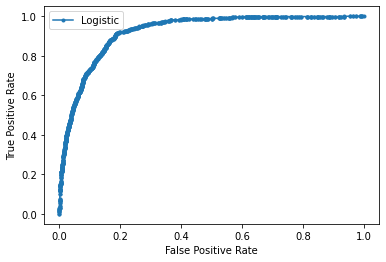

In [89]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate scores->how much data has been understood by the model
auc = roc_auc_score(np.array(y_test), test_pred_prob[:, 1])
# summarize scores

print('Logistic: ROC AUC=%.3f' % (auc))
# calculate roc curves

fpr, tpr, threshold = roc_curve(np.array(y_test), test_pred_prob[:, 1])
# plot the roc curve for the model

pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [90]:
from sklearn.metrics import accuracy_score

score = logisticRegr.score(x,y)
print("Test Accuracy Score", score)
y_pred = logisticRegr.predict(x_test)

score =accuracy_score(y_test,y_pred)
print("Test Accuracy Score", score)


Test Accuracy Score 0.8795054007959068
Test Accuracy Score 0.9332575326890279
